In [15]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [57]:
from fastai.vision import *
from fastai.metrics import error_rate

In [17]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [18]:
path = untar_data(URLs.PETS);

In [19]:
path.ls()

[PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/annotations')]

In [20]:
path_anno = path/'annotations'
path_img = path/'images'

In [21]:
fnames = get_image_files(path_img)

In [22]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [23]:
bs = 64
data = ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),size=224,bs=bs).normalize(imagenet_stats)

In [24]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [25]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate)

In [26]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [36]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.232037,0.279715,0.073748,00:58
1,0.259819,0.277541,0.079838,00:59
2,0.209201,0.248746,0.069689,00:58
3,0.171340,0.242126,0.070365,00:59


In [37]:
learn.save('stage1')

In [40]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

len(data.valid_ds) == len(losses) == len(idxs)

True

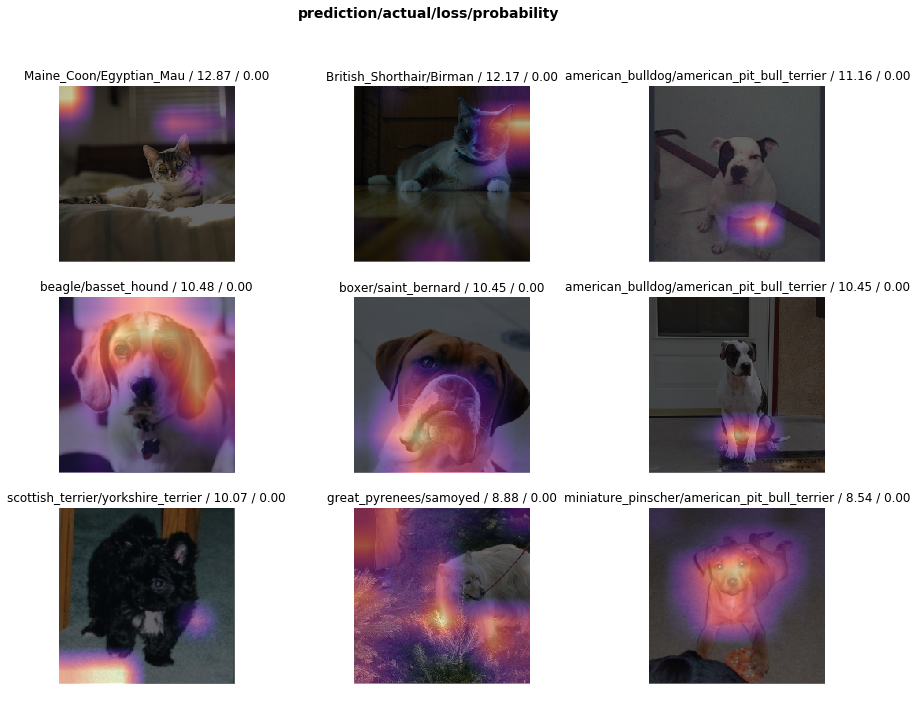

In [41]:
interp.plot_top_losses(9,figsize=(15,11))

In [42]:
doc(interp.plot_top_losses)

_cl_int_plot_top_losses [source] [test] _cl_int_plot_top_losses ( k , largest = True , figsize = (12, 12) , heatmap : bool = True , heatmap_thresh : int = 16 , return_fig : bool = None ) → Optional [ Figure ] 
 
 × No tests found for _cl_int_plot_top_losses . To contribute a test please refer to this guide and this discussion . Show images in top_losses along with their prediction, actual, loss, and probability of actual class. 
 Show in docs

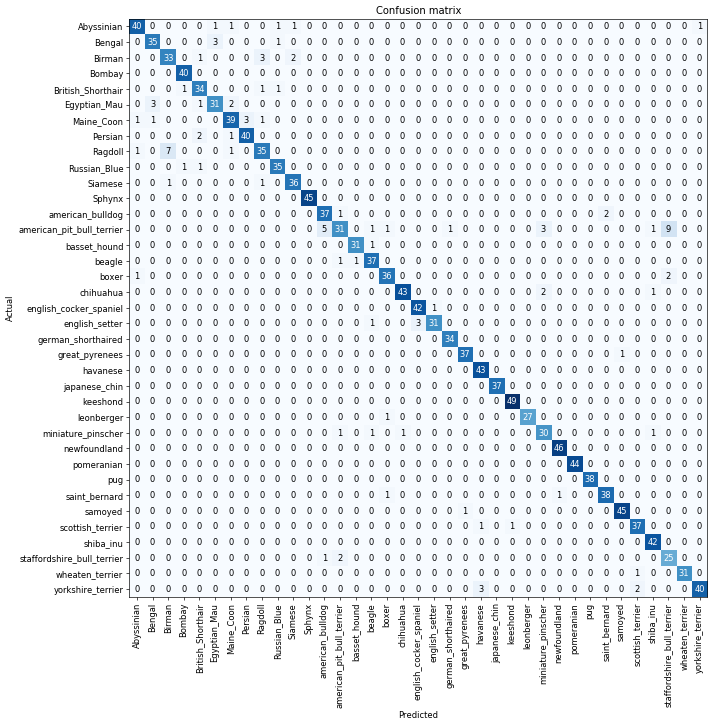

In [43]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [45]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 9),
 ('Ragdoll', 'Birman', 7),
 ('american_pit_bull_terrier', 'american_bulldog', 5),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Birman', 'Ragdoll', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Maine_Coon', 'Persian', 3),
 ('american_pit_bull_terrier', 'miniature_pinscher', 3),
 ('english_setter', 'english_cocker_spaniel', 3),
 ('yorkshire_terrier', 'havanese', 3),
 ('Birman', 'Siamese', 2),
 ('Egyptian_Mau', 'Maine_Coon', 2),
 ('Persian', 'British_Shorthair', 2),
 ('american_bulldog', 'saint_bernard', 2),
 ('boxer', 'staffordshire_bull_terrier', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 2),
 ('yorkshire_terrier', 'scottish_terrier', 2)]

In [ ]:
# some unfreezing needs to be done to learn more?
learn.fit_one_cycle(1)

In [39]:
learn.load("stage1")

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
keeshond,Siamese,german_shorthaired,Russian_Blue,staffordshire_bull_terrier
Path: /home/ubuntu/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Sphynx,Sphynx,havanese,beagle,chihuahua
Path: /home/ubuntu/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3,

In [46]:
data = ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(), size=299, bs=bs//2).normalize(imagenet_stats)

In [47]:
learn = cnn_learner(data,models.resnet50, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/ubuntu/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:00<00:00, 125535655.13it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


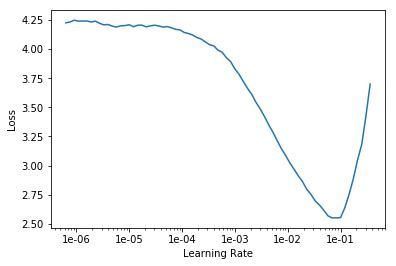

In [48]:
learn.lr_find()
learn.recorder.plot()

In [49]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.738970,0.304966,0.087957,03:11
1,0.397158,0.225586,0.073072,03:05
2,0.319674,0.239617,0.077131,03:04
3,0.282566,0.214519,0.073748,03:05
4,0.216431,0.192880,0.059540,03:04
5,0.159219,0.169740,0.051421,03:05
6,0.104702,0.167490,0.052097,03:04
7,0.105301,0.164978,0.054127,03:05


In [50]:
# learn.save("stage-1-50")
learn.load("stage-1-50")

In [51]:
interp = ClassificationInterpretation.from_learner(learn)

In [52]:
interp.most_confused(min_val=2)

[('Egyptian_Mau', 'Bengal', 9),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 7),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('Birman', 'Ragdoll', 3),
 ('boxer', 'american_bulldog', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Ragdoll', 'Persian', 2),
 ('Siamese', 'Birman', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('miniature_pinscher', 'chihuahua', 2)]